#Reading all the data which have saved in last part

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [36]:
data_final = pd.read_csv('/Users/karteekedumudi/df_modelling.csv')

In [37]:
data_final.columns

Index(['Unnamed: 0', 'id_x', 'ticker', 'title', 'category', 'content',
       'release_date', 'provider', 'words', 'Positive Score', 'Negative Score',
       'Neutral Score', 'Compound', 'PNN Score', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume', 'id_y', 'Release_date',
       'Percentage_change', 'Stock_op'],
      dtype='object')

In [38]:
data_final.drop(['id_x','Unnamed: 0','title','content','words','release_date','id_y'], axis = 1, inplace = True)

In [39]:
df = data_final

Selecting only columns required for analysis

Info

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126338 entries, 0 to 126337
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ticker             126338 non-null  object 
 1   category           126338 non-null  object 
 2   provider           126338 non-null  object 
 3   Positive Score     126338 non-null  float64
 4   Negative Score     126338 non-null  float64
 5   Neutral Score      126338 non-null  float64
 6   Compound           126338 non-null  float64
 7   PNN Score          126338 non-null  int64  
 8   Open               126338 non-null  float64
 9   High               126338 non-null  float64
 10  Low                126338 non-null  float64
 11  Close              126338 non-null  float64
 12  Adj Close          126338 non-null  float64
 13  Volume             126338 non-null  float64
 14  Release_date       126338 non-null  object 
 15  Percentage_change  126338 non-null  float64
 16  St

Kde plot of sentiment. Values above 0 have positive sentiment and below 0 have the negative sentiment. We can see there are two peaks and mostly have strong positive or negative sentiment.

We can even assume that, as most of the top tech companies contribute large portion of data. So, its mostly the positive news that has been coming about companies on the web.

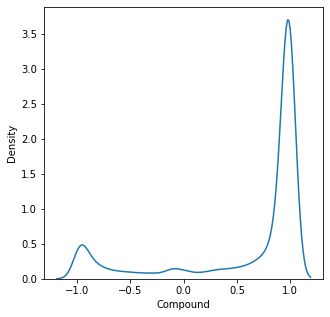

In [41]:
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(5,5))
sns.kdeplot(df['Compound'])
plt.show()

Most of the stock volume lie's between 0 to 200 million

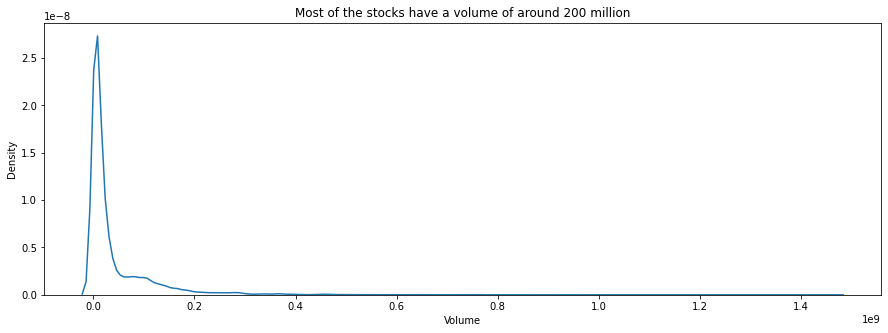

In [42]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,5))
sns.kdeplot(df['Volume'])
plt.title('Most of the stocks have a volume of around 200 million')
plt.show()

#Dropping null values and basic data cleaning

In [43]:
df.dropna(inplace = True)

In [44]:
convert_dict = {'PNN Score':int,
                'Compound':float,
                'Low':float,
                'Open':float
               }
  
df = df.astype(convert_dict)
print(df.dtypes)

ticker                object
category              object
provider              object
Positive Score       float64
Negative Score       float64
Neutral Score        float64
Compound             float64
PNN Score              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume               float64
Release_date          object
Percentage_change    float64
Stock_op               int64
dtype: object


Label encoding few columns

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
df['category'] = df[['category']].apply(LabelEncoder().fit_transform)

In [48]:
df['provider'] = df[['provider']].apply(LabelEncoder().fit_transform)

In [51]:
df['Release_date'] = pd.to_datetime(df['Release_date'])

Data Cleaning

In [53]:
for i in range(len(df['Release_date'])):
    try:
        df['Release_date'].iloc[i] = pd.to_datetime(df['Release_date'].iloc[i], format = "%m/%d/%y")
    except ValueError:
        df['Release_date'].iloc[i] = np.nan
        continue

In [54]:
import datetime as dt
day = dt.timedelta(days=1)
df['day_before'] = df['Release_date'] - day

In [55]:
df

,ticker,category,provider,Positive Score,Negative Score,Neutral Score,Compound,PNN Score,Open,High,Low,Close,Adj Close,Volume,Release_date,Percentage_change,Stock_op,day_before
0,UBER,1,846,0.132,0.061,0.808,0.9723,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21
1,UBER,1,846,0.141,0.050,0.809,0.9618,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21
2,UBER,0,388,0.165,0.047,0.788,0.9811,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21
3,UBER,0,541,0.202,0.000,0.798,0.9565,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21
4,UBER,0,662,0.060,0.020,0.920,0.7845,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126333,T,1,772,0.142,0.052,0.806,0.9989,1,26.246223,26.344412,26.004532,26.125378,12.538348,27263014.0,2012-10-31,0.460431,0,2012-10-30
126334,T,1,431,0.190,0.108,0.701,0.9991,1,28.927492,29.070997,28.867069,28.889729,13.654369,26647089.0,2012-09-24,0.130546,0,2012-09-23
126335,T,1,396,0.037,0.152,0.812,-0.9874,-1,28.950151,29.025681,28.867069,28.957705,13.686497,26907255.0,2012-10-04,-0.026090,1,2012-10-03
126336,T,1,746,0.182,0.080,0.738,0.9899,1,25.468279,25.762840,25.453173,25.558912,11.883363,39932899.0,2012-05-30,-0.355868,1,2012-05-29


In [56]:
df['ticker'] = df[['ticker']].apply(LabelEncoder().fit_transform)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126338 entries, 0 to 126337
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ticker             126338 non-null  int64         
 1   category           126338 non-null  int64         
 2   provider           126338 non-null  int64         
 3   Positive Score     126338 non-null  float64       
 4   Negative Score     126338 non-null  float64       
 5   Neutral Score      126338 non-null  float64       
 6   Compound           126338 non-null  float64       
 7   PNN Score          126338 non-null  int64         
 8   Open               126338 non-null  float64       
 9   High               126338 non-null  float64       
 10  Low                126338 non-null  float64       
 11  Close              126338 non-null  float64       
 12  Adj Close          126338 non-null  float64       
 13  Volume             126338 non-null  float64 

In [58]:
df

,ticker,category,provider,Positive Score,Negative Score,Neutral Score,Compound,PNN Score,Open,High,Low,Close,Adj Close,Volume,Release_date,Percentage_change,Stock_op,day_before
0,86,1,846,0.132,0.061,0.808,0.9723,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21
1,86,1,846,0.141,0.050,0.809,0.9618,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21
2,86,0,388,0.165,0.047,0.788,0.9811,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21
3,86,0,541,0.202,0.000,0.798,0.9565,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21
4,86,0,662,0.060,0.020,0.920,0.7845,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126333,81,1,772,0.142,0.052,0.806,0.9989,1,26.246223,26.344412,26.004532,26.125378,12.538348,27263014.0,2012-10-31,0.460431,0,2012-10-30
126334,81,1,431,0.190,0.108,0.701,0.9991,1,28.927492,29.070997,28.867069,28.889729,13.654369,26647089.0,2012-09-24,0.130546,0,2012-09-23
126335,81,1,396,0.037,0.152,0.812,-0.9874,-1,28.950151,29.025681,28.867069,28.957705,13.686497,26907255.0,2012-10-04,-0.026090,1,2012-10-03
126336,81,1,746,0.182,0.080,0.738,0.9899,1,25.468279,25.762840,25.453173,25.558912,11.883363,39932899.0,2012-05-30,-0.355868,1,2012-05-29


In [59]:
#Data Description

In [60]:
df.drop(columns = ['ticker','category','provider'],axis = 1).describe()

,Positive Score,Negative Score,Neutral Score,Compound,PNN Score,Open,High,Low,Close,Adj Close,Volume,Percentage_change,Stock_op
count,126338.000000,126338.000000,126338.000000,126338.000000,126338.000000,126338.000000,126338.000000,126338.000000,126338.000000,126338.000000,1.263380e+05,126338.000000,126338.000000
mean,0.147113,0.067850,0.785039,0.589538,0.619378,189.809780,191.719212,187.715234,189.815957,183.638691,4.081235e+07,-0.008860,0.509965
std,0.059215,0.048482,0.062725,0.659865,0.781078,337.774582,340.933872,334.084528,337.765406,338.705498,7.682147e+07,1.806781,0.499903
min,0.000000,0.000000,0.301000,-0.999900,-1.000000,2.270000,2.420000,2.250000,2.370000,1.718494,1.930000e+04,-40.744516,0.000000
25%,0.107000,0.031000,0.744000,0.506100,1.000000,39.474998,39.942501,38.900002,39.439999,36.189117,3.939300e+06,-0.804193,0.000000
50%,0.144000,0.060000,0.782000,0.960100,1.000000,68.300003,69.211803,67.500000,68.430000,62.168074,1.117500e+07,-0.033088,1.000000
75%,0.184000,0.097000,0.823000,0.992800,1.000000,154.300003,155.527500,153.076920,154.369995,142.677624,3.896760e+07,0.757536,1.000000
max,0.699000,0.667000,1.000000,1.000000,1.000000,2071.020020,2098.530029,2038.099976,2079.280029,2079.280029,1.460852e+09,37.364489,1.000000


In [61]:
df.columns

Index(['ticker', 'category', 'provider', 'Positive Score', 'Negative Score',
       'Neutral Score', 'Compound', 'PNN Score', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume', 'Release_date', 'Percentage_change',
       'Stock_op', 'day_before'],
      dtype='object')

Dropping unwanted columns and defining X and y. Later do the train test split

In [71]:
X = df.drop(['Stock_op','day_before','Release_date'], axis = 1)

In [72]:
X

,ticker,category,provider,Positive Score,Negative Score,Neutral Score,Compound,PNN Score,Open,High,Low,Close,Adj Close,Volume,Percentage_change
0,86,1,846,0.132,0.061,0.808,0.9723,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2.372161
1,86,1,846,0.141,0.050,0.809,0.9618,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2.372161
2,86,0,388,0.165,0.047,0.788,0.9811,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2.372161
3,86,0,541,0.202,0.000,0.798,0.9565,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2.372161
4,86,0,662,0.060,0.020,0.920,0.7845,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2.372161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126333,81,1,772,0.142,0.052,0.806,0.9989,1,26.246223,26.344412,26.004532,26.125378,12.538348,27263014.0,0.460431
126334,81,1,431,0.190,0.108,0.701,0.9991,1,28.927492,29.070997,28.867069,28.889729,13.654369,26647089.0,0.130546
126335,81,1,396,0.037,0.152,0.812,-0.9874,-1,28.950151,29.025681,28.867069,28.957705,13.686497,26907255.0,-0.026090
126336,81,1,746,0.182,0.080,0.738,0.9899,1,25.468279,25.762840,25.453173,25.558912,11.883363,39932899.0,-0.355868


Stock_op is the output feature

In [73]:
y = df['Stock_op']

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Checking different ML algorithms to find the best

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [77]:
models = []
models.append(('SVM',svm.SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

KNN stands out with an accuracy of around 71.2%

In [78]:
from sklearn.metrics import accuracy_score
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Accuray Score': scores})
print(tr_split)

  Name  Accuray Score
0  SVM       0.518838
1  KNN       0.761042
2   LR       0.513218
3   DT       1.000000
4  GNB       0.510712
5   RF       1.000000


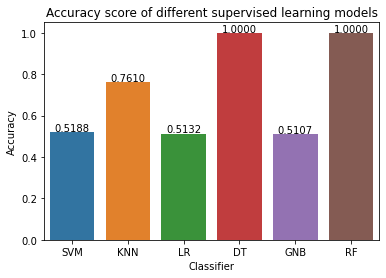

In [79]:
axis = sns.barplot(x = tr_split['Name'], y = tr_split['Accuray Score'], data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
plt.title('Accuracy score of typical supervised learning models')
plt.show()

In [96]:
model = KNeighborsClassifier()
from sklearn.metrics import accuracy_score
model.fit(X_train, y_train)
y_pred = model.predict(X)
accuracy_score(y, y_pred)

0.8217163482087733

Confusion Matrix

In [97]:
from sklearn.metrics import confusion_matrix

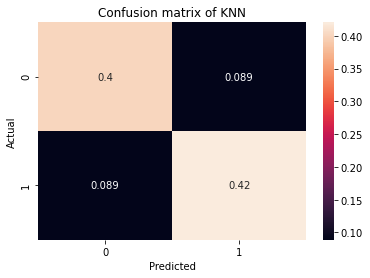

In [99]:
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_pred,y,normalize = 'all'),annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion matrix of KNN")
plt.show()

In [100]:
y_pred = model.predict(X)

In [101]:
accuracy_score(y, y_pred)

0.8217163482087733

#Visualization

In [102]:
df['Predicted'] = list(y_pred)

In [103]:
df

,ticker,category,provider,Positive Score,Negative Score,Neutral Score,Compound,PNN Score,Open,High,Low,Close,Adj Close,Volume,Release_date,Percentage_change,Stock_op,day_before,Predicted
0,86,1,846,0.132,0.061,0.808,0.9723,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21,0
1,86,1,846,0.141,0.050,0.809,0.9618,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21,0
2,86,0,388,0.165,0.047,0.788,0.9811,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21,0
3,86,0,541,0.202,0.000,0.798,0.9565,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21,0
4,86,0,662,0.060,0.020,0.920,0.7845,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126333,81,1,772,0.142,0.052,0.806,0.9989,1,26.246223,26.344412,26.004532,26.125378,12.538348,27263014.0,2012-10-31,0.460431,0,2012-10-30,0
126334,81,1,431,0.190,0.108,0.701,0.9991,1,28.927492,29.070997,28.867069,28.889729,13.654369,26647089.0,2012-09-24,0.130546,0,2012-09-23,0
126335,81,1,396,0.037,0.152,0.812,-0.9874,-1,28.950151,29.025681,28.867069,28.957705,13.686497,26907255.0,2012-10-04,-0.026090,1,2012-10-03,1
126336,81,1,746,0.182,0.080,0.738,0.9899,1,25.468279,25.762840,25.453173,25.558912,11.883363,39932899.0,2012-05-30,-0.355868,1,2012-05-29,1


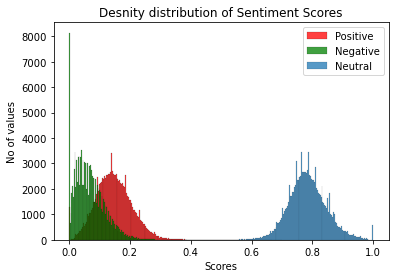

In [114]:
sns.histplot(df['Positive Score'],color = 'r',label='Positive')
sns.histplot(df['Negative Score'], color = 'g',label='Negative')
sns.histplot(df['Neutral Score'],label='Neutral')
plt.xlabel('Scores')
plt.ylabel('No of values')
plt.legend()
plt.title("Desnity distribution of Sentiment Scores")
plt.show()

In [118]:
df

,ticker,category,provider,Positive Score,Negative Score,Neutral Score,Compound,PNN Score,Open,High,Low,Close,Adj Close,Volume,Release_date,Percentage_change,Stock_op,day_before,Predicted
0,86,1,846,0.132,0.061,0.808,0.9723,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21,0
1,86,1,846,0.141,0.050,0.809,0.9618,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21,0
2,86,0,388,0.165,0.047,0.788,0.9811,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21,0
3,86,0,541,0.202,0.000,0.798,0.9565,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21,0
4,86,0,662,0.060,0.020,0.920,0.7845,1,37.939999,37.939999,36.919998,37.040001,37.040001,29765200.0,2020-01-22,2.372161,0,2020-01-21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126333,81,1,772,0.142,0.052,0.806,0.9989,1,26.246223,26.344412,26.004532,26.125378,12.538348,27263014.0,2012-10-31,0.460431,0,2012-10-30,0
126334,81,1,431,0.190,0.108,0.701,0.9991,1,28.927492,29.070997,28.867069,28.889729,13.654369,26647089.0,2012-09-24,0.130546,0,2012-09-23,0
126335,81,1,396,0.037,0.152,0.812,-0.9874,-1,28.950151,29.025681,28.867069,28.957705,13.686497,26907255.0,2012-10-04,-0.026090,1,2012-10-03,1
126336,81,1,746,0.182,0.080,0.738,0.9899,1,25.468279,25.762840,25.453173,25.558912,11.883363,39932899.0,2012-05-30,-0.355868,1,2012-05-29,1


In [119]:
# save the model
import pickle
pickle.dump(model, open("Capstone_model.pkl", "wb"))